<a href="https://colab.research.google.com/github/Digvijayapatro/Classification_machine_learning/blob/main/KNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:

# Load Titanic dataset
titanic_df = pd.read_csv('/content/train.csv')

In [62]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
titanic_df.shape#check no of rows and colums

(891, 12)

In [64]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data Preprocessing

In [65]:
null_values = titanic_df.isnull().sum()
null_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
#drop unnessary columns
titanic_df.drop([ 'PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


In [67]:
titanic_df.fillna(titanic_df.mean(), inplace=True)
titanic_df['Sex'] = pd.factorize(titanic_df['Sex'])[0]

<ipython-input-67-242e795a3892>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.fillna(titanic_df.mean(), inplace=True)


In [68]:
# Split features and target
x_train = titanic_df.drop('Survived', axis=1).values
y_train = titanic_df['Survived'].values

In [69]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(x_train, y_train, x_test, k):
    y_pred = []
    for test_sample in x_test:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in x_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        y_pred.append(predicted_label)
    return np.array(y_pred)

In [70]:
# Run KNN algorithm
k = 5  # number of neighbors
y_pred = knn(x_train, y_train, x_train, k)

In [71]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_train)
print("Accuracy:", accuracy)

Accuracy: 0.8114478114478114


In [72]:
# Generate submission file
submission_df = pd.DataFrame({'Survived': y_pred})
submission_df.to_csv('submission.csv', index_label='PassengerId')

**Visualization**

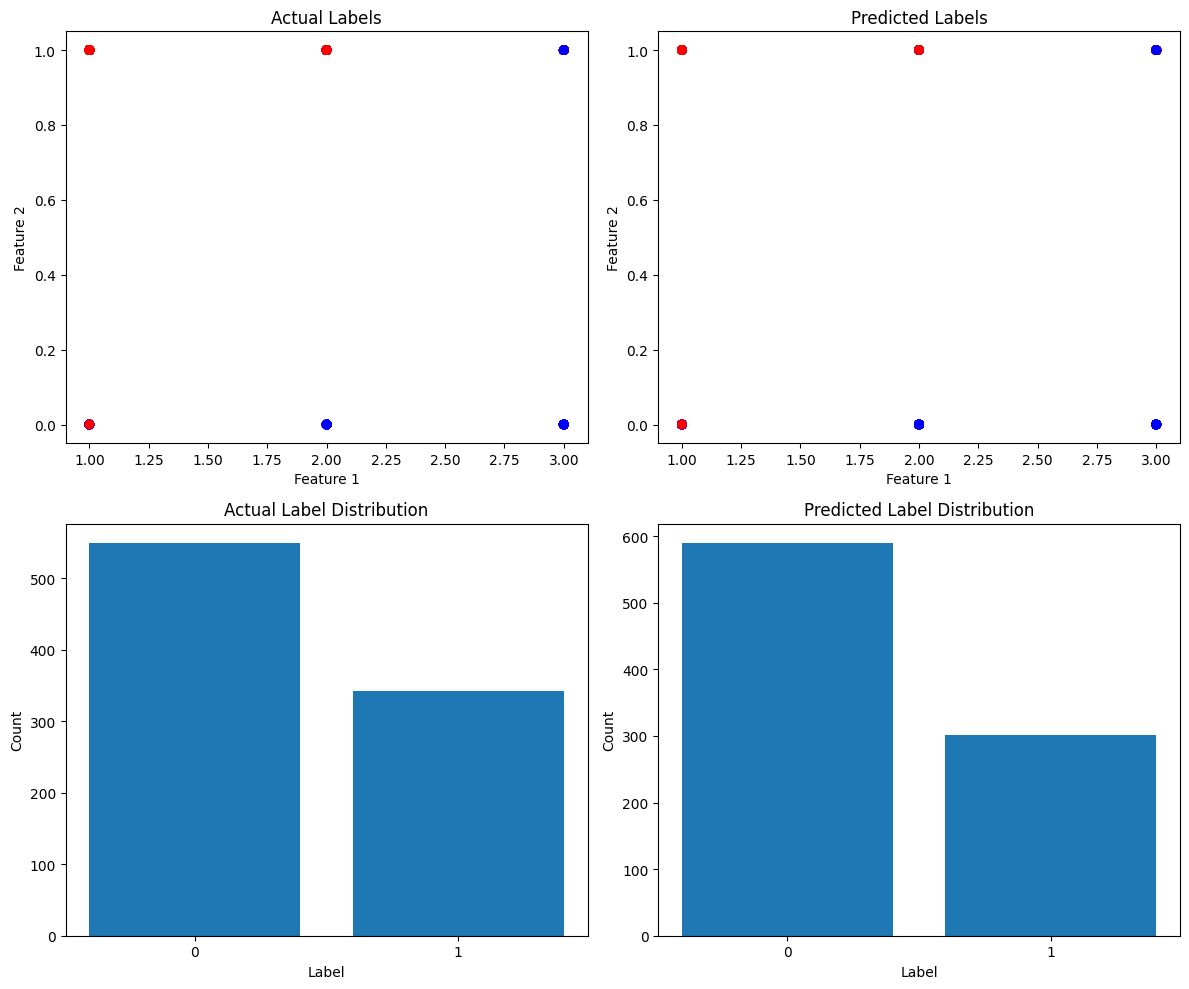

In [73]:

# Visualize results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
# Scatter plot of two features with actual labels
axes[0, 0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_title('Actual Labels')
# Scatter plot of two features with predicted labels
axes[0, 1].scatter(x_train[:, 0], x_train[:, 1], c=y_pred, cmap='bwr')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].set_title('Predicted Labels')
# Bar plot of actual label distribution
unique_labels, label_counts = np.unique(y_train, return_counts=True)
axes[1, 0].bar(unique_labels, label_counts)
axes[1, 0].set_xticks(unique_labels)
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Actual Label Distribution')
# Bar plot of predicted label distribution
unique_labels, label_counts = np.unique(y_pred, return_counts=True)
axes[1, 1].bar(unique_labels, label_counts)
axes[1, 1].set_xticks(unique_labels)
axes[1, 1].set_xlabel('Label')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Predicted Label Distribution')

plt.tight_layout()
plt.show()

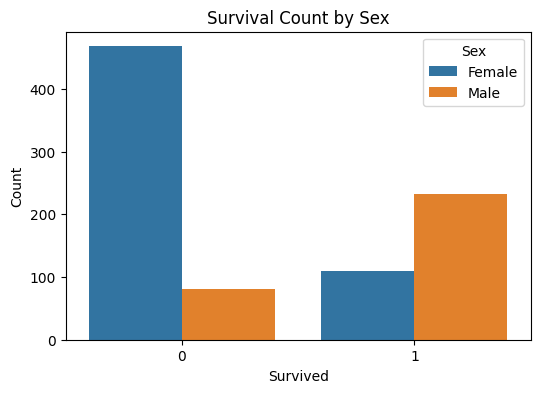

In [76]:
# Visualize survival count based on sex
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

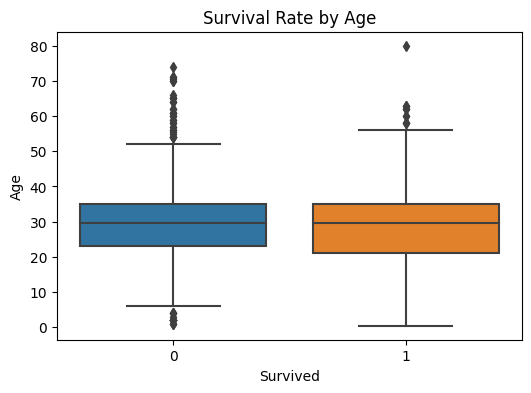

In [77]:
# Visualize survival rate by age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival Rate by Age')
plt.show()

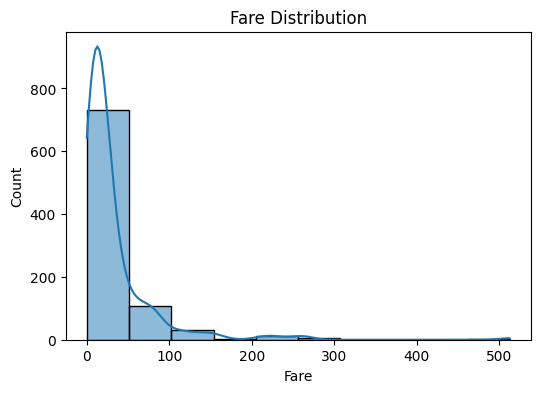

In [78]:
# Visualize fare distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(titanic_df['Fare'], bins=10, kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

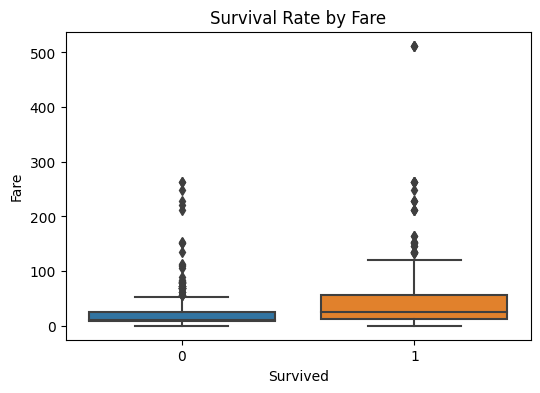

In [79]:
# Visualize survival rate by fare
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Survival Rate by Fare')
plt.show()